<a href="https://colab.research.google.com/github/SujithSajeev-17/NLP/blob/main/Twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Package Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
#Preprocessing

df = pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1') # encoding mandatory
df


,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [60]:
df.columns=['ID','Social_Media','target','text']
df

,ID,Social_Media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [61]:
df.dtypes


ID               int64
Social_Media    object
target          object
text            object
dtype: object

In [62]:
df.head()

,ID,Social_Media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [63]:
df.tail()

,ID,Social_Media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [64]:
df.isna().sum()

ID              0
Social_Media    0
target          0
text            0
dtype: int64

In [65]:
df['Social_Media'].value_counts()

Social_Media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                      

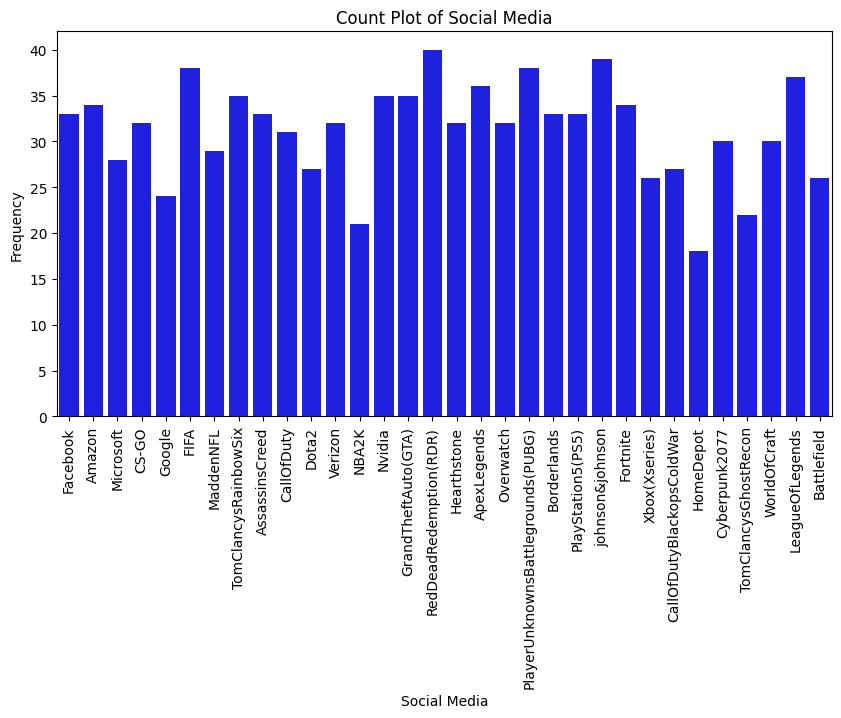

In [66]:
plt.figure(figsize=(10,5))
plt.title('Count Plot of Social Media')
plt.xlabel('Social Media')
plt.ylabel('Frequency')
sns.countplot(x='Social_Media',data=df,color='b')
plt.xticks(rotation=90)
plt.show()

In [67]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

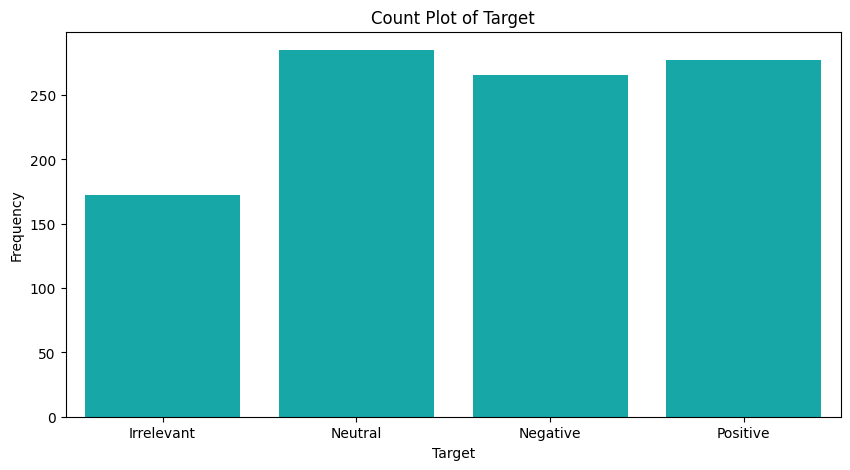

In [68]:
plt.figure(figsize=(10,5))
plt.title('Count Plot of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
sns.countplot(x='target',data=df,color='c')
plt.show()

In [69]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True,)
df

,ID,Social_Media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [70]:
df.reset_index(drop=True,inplace=True)
df


,ID,Social_Media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [71]:
df.drop(['ID','Social_Media'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [72]:
# df['target']=df['target'].str.replace('Neutral','0')
# df['target']=df['target'].str.replace('Negative','-1')
# df['target']=df['target'].str.replace('Positive','1')
# df

df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df


,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [73]:
tweets= df.text #tweets = df['text']
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [74]:
# tokenization

from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
tweets = tweets.apply(lambda x: tt.tokenize(x)).apply(lambda x: " ".join(x)) # .apply used for lambda # joining tokenized words with space
tweets


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [75]:
#special characters removal

# tweets= re.sub ('[^a-zA-Z0-9]+',' ',tweets)


tweets= tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [76]:
#removing words less than 3 letters

from nltk.tokenize import word_tokenize

tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w)>=3])) # word_tokenize / tt.tokenize(x)
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked itâ time drink wine play borderla...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [77]:
#stemming | root word identifier

from nltk.stem import SnowballStemmer

sbs = SnowballStemmer('english')
tweets = tweets.apply(lambda x: [sbs.stem(i.lower()) for i in tt.tokenize(x)]).apply(lambda x: ' '.join(x))
tweets



0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck itâ time drink wine play borderland...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [78]:
# stopwords removal
from nltk.corpus import stopwords

sw = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in tt.tokenize(x) if i not in sw]).apply(lambda x: ' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg it...
824    good soni much want see new ps5 go right much ...
825    today suck itâ time drink wine play borderland...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [79]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
train_data = vect.fit_transform(tweets)
train_data

<828x3925 sparse matrix of type '<class 'numpy.float64'>'
	with 10813 stored elements in Compressed Sparse Row format>

In [80]:
train_data.shape

(828, 3925)

In [81]:
y = df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

##**Train and Test data seperation**


In [82]:
x_train,x_test,y_train,y_test = train_test_split(train_data,y,test_size=0.2,random_state=42)

##**K-Neighbors Classifier**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([-1,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  1,  0,  1, -1, -1, -1, -1, -1,  1, -1, -1,
        1, -1,  0, -1, -1,  1, -1, -1,  0,  1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  1,  1, -1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,
        1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1,
        0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  1, -1,  0,  0,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  0,  1,  0, -1,  0, -1, -1, -1,  1,  1,  0])

In [85]:
acc_score_knn = accuracy_score(y_test,y_pred_knn)
acc_score_knn

0.45180722891566266

In [86]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[43,  6,  6],
       [26, 15,  5],
       [39,  9, 17]])

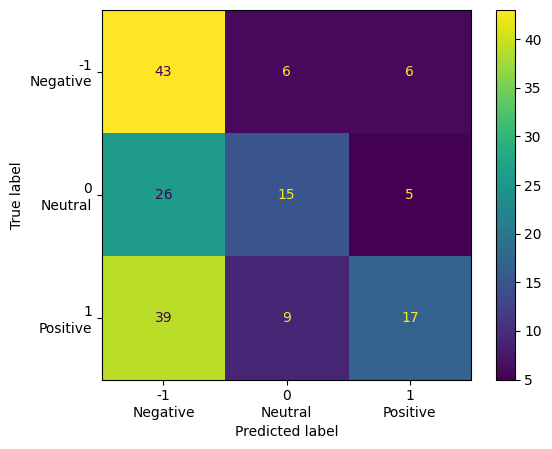

In [87]:
cmd_knn = ConfusionMatrixDisplay(cm_knn,display_labels=['-1\nNegative','0\nNeutral','1\nPositive'])
cmd_knn.plot()
plt.show()

In [88]:
report_knn = pd.DataFrame(classification_report(y_test,y_pred_knn,output_dict=True)).T
report_knn

,precision,recall,f1-score,support
-1,0.398148,0.781818,0.527607,55.000000
0,0.500000,0.326087,0.394737,46.000000
1,0.607143,0.261538,0.365591,65.000000
accuracy,0.451807,0.451807,0.451807,0.451807
macro avg,0.501764,0.456481,0.429312,166.000000
weighted avg,0.508207,0.451807,0.427348,166.000000


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn ={
    'weights':['uniform','distance'],
    'n_neighbors':range(1,10),
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'metric':['euclidean','manhattan','minkowski'],
    'leaf_size':range(1,10),
    'p':[1,2],
    'n_jobs':[-1]
}

grid_search_knn = GridSearchCV(knn,param_grid_knn,cv=5)
grid_search_knn.fit(x_train,y_train)

best_param_knn = grid_search_knn.best_params_
best_param_knn

##**Naive Bayes**

In [89]:
from sklearn.naive_bayes import MultinomialNB

nb =  MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [90]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([ 1,  0,  1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  1, -1, -1, -1,
        1, -1,  1, -1,  0,  0,  1,  0,  1,  1, -1, -1,  1,  0,  1, -1,  1,
        1, -1,  0, -1, -1,  1,  1,  1,  0,  1,  0,  1,  0,  0, -1,  1,  0,
       -1, -1,  0,  0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1,  0,  0,  0,
       -1,  1,  1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0, -1,  0, -1,  0,
        1,  0,  1,  1,  1, -1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  0,  1, -1,  1,  0,  0,  1,  1,  0,  1,  0,  1, -1,  0, -1, -1,
        0,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  1, -1,  1, -1,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  1,
       -1, -1,  0,  1,  0,  0,  0, -1, -1, -1, -1,  0,  0])

In [91]:
acc_score_nb = accuracy_score(y_test,y_pred_nb)
acc_score_nb

0.5662650602409639

In [92]:
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[28, 19,  8],
       [ 8, 28, 10],
       [ 8, 19, 38]])

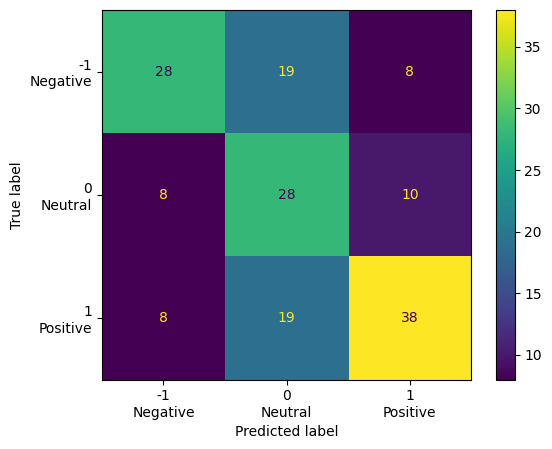

In [93]:
cmd_nb = ConfusionMatrixDisplay(cm_nb,display_labels=['-1\nNegative','0\nNeutral','1\nPositive'])
cmd_nb.plot()
plt.show()

In [94]:
report_nb = pd.DataFrame(classification_report(y_test,y_pred_nb,output_dict=True)).T
report_nb

,precision,recall,f1-score,support
-1,0.636364,0.509091,0.565657,55.000000
0,0.424242,0.608696,0.500000,46.000000
1,0.678571,0.584615,0.628099,65.000000
accuracy,0.566265,0.566265,0.566265,0.566265
macro avg,0.579726,0.567467,0.564585,166.000000
weighted avg,0.594110,0.566265,0.571913,166.000000


##**XGBoost**

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100)
xgb.fit(x_train,y_train_en)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1])

In [98]:
acc_score_xgb = accuracy_score(y_test_en,y_pred_xgb)
acc_score_xgb

0.5421686746987951

In [99]:
cm_xgb = confusion_matrix(y_test_en,y_pred_xgb)
cm_xgb

array([[27, 19,  9],
       [12, 26,  8],
       [10, 18, 37]])

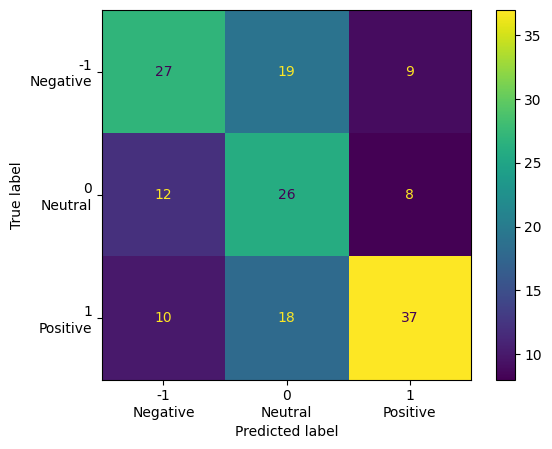

In [100]:
cmd_rf = ConfusionMatrixDisplay(cm_xgb,display_labels=['-1\nNegative','0\nNeutral','1\nPositive'])
cmd_rf.plot()
plt.show()

In [101]:
report_xgb = pd.DataFrame(classification_report(y_test_en,y_pred_xgb,output_dict=True)).T
report_xgb

,precision,recall,f1-score,support
0,0.551020,0.490909,0.519231,55.000000
1,0.412698,0.565217,0.477064,46.000000
2,0.685185,0.569231,0.621849,65.000000
accuracy,0.542169,0.542169,0.542169,0.542169
macro avg,0.549635,0.541786,0.539381,166.000000
weighted avg,0.565225,0.542169,0.547728,166.000000


##**AdaBoost**

In [102]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [103]:
y_pred_abc = abc.predict(x_test)
y_pred_abc

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1,  0,  0,  1,  0,  1,  1,  1, -1,
        1, -1,  1,  0,  1,  0,  1,  0,  1,  0, -1,  1,  0,  0,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  0,  0,  1,  0,  0,  0,  0,  1, -1,  0,
        1, -1,  0,  1, -1,  1,  0,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,
       -1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1, -1,  1,  1,  0,  0,
        1,  0,  1,  1,  1,  1, -1, -1,  1,  0,  0,  0,  0, -1,  0,  1,  1,
        1,  1,  1,  1, -1,  1,  0,  1,  1, -1,  1,  0,  1, -1, -1,  1, -1,
        1,  0,  0,  1,  1,  1,  0, -1,  1,  0,  0,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  1, -1,  0,  0,  1,  1,  1,  1,  1,  1, -1,  1,  0,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  0])

In [104]:
acc_score_abc = accuracy_score(y_test,y_pred_abc)
acc_score_abc

0.4879518072289157

In [105]:
cm_abc = confusion_matrix(y_test,y_pred_abc)
cm_abc

array([[15, 10, 30],
       [ 4, 23, 19],
       [10, 12, 43]])

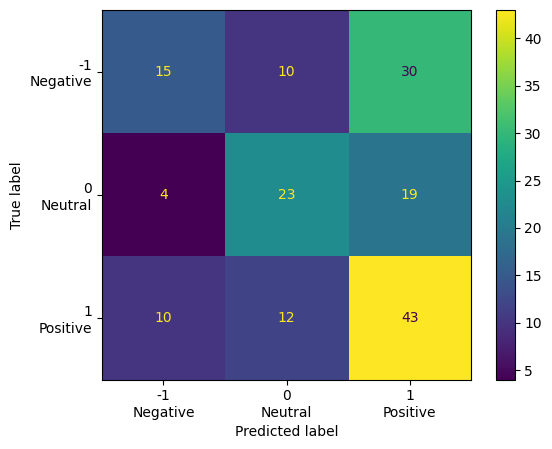

In [106]:
cmd_abc = ConfusionMatrixDisplay(cm_abc,display_labels=['-1\nNegative','0\nNeutral','1\nPositive'])
cmd_abc.plot()
plt.show()

In [107]:
report_dt = pd.DataFrame(classification_report(y_test,y_pred_abc,output_dict=True)).T
report_dt

,precision,recall,f1-score,support
-1,0.517241,0.272727,0.357143,55.000000
0,0.511111,0.500000,0.505495,46.000000
1,0.467391,0.661538,0.547771,65.000000
accuracy,0.487952,0.487952,0.487952,0.487952
macro avg,0.498581,0.478089,0.470136,166.000000
weighted avg,0.496023,0.487952,0.472896,166.000000


##**Decision Tree**


In [108]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([-1,  0,  1, -1,  0, -1, -1, -1,  1, -1,  0, -1,  0,  1,  0, -1, -1,
       -1, -1, -1,  0,  0,  0, -1,  0,  1,  0, -1, -1,  0,  0,  1, -1,  0,
        1, -1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0, -1,  0,
       -1, -1, -1,  0, -1, -1, -1,  0,  0,  1, -1, -1,  0, -1,  0,  0, -1,
       -1, -1,  1,  0,  0, -1,  1,  1, -1,  0, -1,  1, -1,  1, -1,  1,  0,
       -1,  0,  1,  0,  0,  1,  1, -1,  1,  1,  0, -1,  0,  0, -1,  0,  1,
        1,  1,  0, -1,  0, -1,  0, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  1,  1, -1,  0,  1,  1,
       -1, -1, -1,  0, -1,  1,  1, -1,  0,  0, -1,  0,  0, -1, -1,  0,  0,
       -1, -1, -1,  1,  1,  1,  0, -1,  0,  1,  0,  1,  0])

In [110]:
acc_score_dt = accuracy_score(y_test,y_pred_dt)
acc_score_dt

0.4578313253012048

In [111]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[27, 15, 13],
       [11, 25, 10],
       [24, 17, 24]])

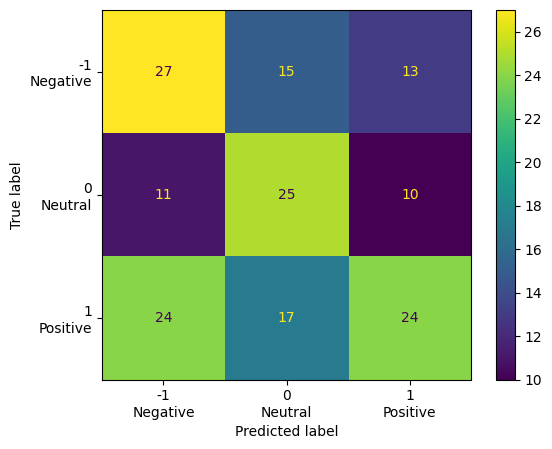

In [112]:
cmd_dt = ConfusionMatrixDisplay(cm_dt,display_labels=['-1\nNegative','0\nNeutral','1\nPositive'])
cmd_dt.plot()
plt.show()

In [113]:
report_dt = pd.DataFrame(classification_report(y_test,y_pred_dt,output_dict=True)).T
report_dt

,precision,recall,f1-score,support
-1,0.435484,0.490909,0.461538,55.000000
0,0.438596,0.543478,0.485437,46.000000
1,0.510638,0.369231,0.428571,65.000000
accuracy,0.457831,0.457831,0.457831,0.457831
macro avg,0.461573,0.467873,0.458516,166.000000
weighted avg,0.465774,0.457831,0.455252,166.000000


##**Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred = rf.predict(x_test)
y_pred

array([ 1,  0,  1, -1, -1, -1, -1,  1, -1,  0,  0, -1,  0,  1, -1, -1, -1,
        1, -1, -1,  0,  0,  0,  1,  0,  1,  1, -1, -1,  0,  0,  1, -1,  1,
        1, -1, -1, -1, -1,  1,  1,  0,  0, -1,  0,  1,  0,  0, -1,  1,  0,
       -1, -1, -1,  0, -1,  1, -1,  0, -1,  1,  1, -1,  0,  1,  0,  0,  0,
       -1, -1,  1,  0,  0,  1,  1, -1, -1,  0, -1,  1, -1, -1, -1,  0,  0,
       -1,  0,  1, -1,  1, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0,  1,
        1, -1,  0, -1,  0, -1,  0,  0, -1,  0,  1,  0, -1, -1, -1,  1, -1,
       -1,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  1, -1, -1,  0,  1,  1,
       -1,  1, -1,  1, -1,  0,  1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  0])

In [116]:
acc_score_rf = accuracy_score(y_test,y_pred)
acc_score_rf

0.5481927710843374

In [117]:
cm_rf = confusion_matrix(y_test,y_pred)
cm_rf

array([[39, 10,  6],
       [16, 25,  5],
       [23, 15, 27]])

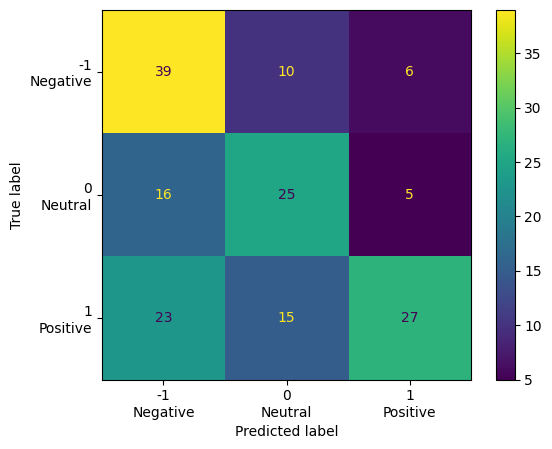

In [118]:
labels= ['-1\nNegative','0\nNeutral','1\nPositive']
cmd_rf = ConfusionMatrixDisplay(cm_rf,display_labels=labels)
cmd_rf.plot()
plt.show()

In [119]:
report_rf = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
report_rf

,precision,recall,f1-score,support
-1,0.500000,0.709091,0.586466,55.000000
0,0.500000,0.543478,0.520833,46.000000
1,0.710526,0.415385,0.524272,65.000000
accuracy,0.548193,0.548193,0.548193,0.548193
macro avg,0.570175,0.555985,0.543857,166.000000
weighted avg,0.582435,0.548193,0.543926,166.000000


In [ ]:
{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}